# LSL hands-on 2:
# Latency tests and how to LSL on a heavy 3D environment
<br>

### Tea Time 13.08.2020 - Doborah Nolte and Marc Vidal De Palol

## Outline

1. Recap: Aligning data streams sampled from different sources
2. Recap: Lab Streaming Layer (LSL) as data streams aligning solution
3. How to use LSL (Unity with EEG use case)
4. Test design
5. Recap: How does the data look like?
6. Results
7. Conclusions and remarks
8. Future outlook

## 1. Recap: Aligning data streams sampled from different sources

Data sampling devices have different:
- Sampling rates (e.g. 1000Hz for EEG, 60FPS in Unity, 90Hz for Eye-Tracking, etc.)
- CPU clocks (diff. CPU clocks between computers, EEG amplifiers, etc.)

<img src="img/sines.png" width="20%"><img src="img/cpu.png" width="10%">

- Data streaming over network -> LAN/WLAN latencies

## 2. Recap: Lab Streaming Layer (LSL) as data streams aligning solution

Why LSL?
- Manually aligning data streams can be really time consuming
- Standard tool in the science community: community support :)

Also:
- open source
- cross platform (Win, Linux, MacOS, Android, iOS) and multi language APIs (C, C++, Python, Java, C#, MATLAB)
- many GUI tools supporting standard technologies and devices
- XDF data recordings (meant to be a standard format in science)

Source: https://labstreaminglayer.readthedocs.io/info/intro.html#what-is-lsl

## 3. How to use LSL (Unity with EEG use case)
How to use LSL? General requirements:
- LabRecorder app: https://github.com/labstreaminglayer/App-LabRecorder/releases
<img src="img/labrecorder.png" width="50%">
- `liblsl` library (https://github.com/sccn/liblsl/releases/latest) with code defining your data streams

    and/or

## 3. How to use LSL (Unity with EEG use case)
How to use LSL? General requirements:

    and/or

- LSL community app (e.g. OpenVibe Data Acquisition Server: http://openvibe.inria.fr/downloads/)

<img src="img/ovas.png" width="50%">

## 3. How to use LSL (Unity with EEG use case)

Code example in C# defining a data stream:
```csharp
using LSL;
public class yourClass
{
    // declare your data stream
    private liblsl.StreamInfo lslStreamInfo; // stream information
    private liblsl.StreamOutlet lslOutlet; // actual stream to send out
    void startingMethod() { // normally Start() in Unity
        // instantiate your stream
        lslStreamInfo = new liblsl.StreamInfo(
            sName, // name of your stream
            sType, // stream type
            nValues, // you send an array, so how many values it contains
            nominalRate, // constant or not
            LslChannelFormat, // if you send integers, floats, etc.
            uuid); // universally unique identifier
        lslOutlet = new liblsl.StreamOutlet(streamInfo);
    }
    void sendingMethod() { // normally FixedUpdate() in Unity
        var data = new float[nValues]; // data you want to send
        lslOutlet.push_sample(data); // send/stream your data
    }
}
```
More examples  https://labstreaminglayer.readthedocs.io/dev/examples.html

API reference: https://labstreaminglayer.readthedocs.io/projects/liblsl/index.html

## 3. How to use LSL (Unity with EEG use case)
Use case (our test setup):

<img src="img/test_design.png" width="40%"><img src="img/setup.jpg" width="40%">

## 3. How to use LSL (Unity with EEG use case)
Where to place `liblsl` on Unity:
- `liblsl`library
<img src="img/lsl_unity.png" width="30%">

- `LSL.cs` class -> https://github.com/labstreaminglayer/liblsl-Csharp/blob/master/LSL.cs
<img src="img/lsl_class.png" width="30%">

## 3. How to use LSL (Unity with EEG use case)
How to make OpenVibe Acquisition Server (AVAS) work with `liblsl`:

- `liblsl` library replacement

<img src="img/openvibe_liblsl.png" width="60%">

__Important:__ make sure you share the same `liblsl` version between the LabRecorder, Unity and your scripts and/or any community LSL app. You can always overwrite the shipped one if you're unsure.

## 3. How to use LSL (Unity with EEG use case)
How to make OpenVibe Acquisition Server (AVAS) work with `liblsl`:

- LSL configuration file  library "hack"

<img src="img/openvibe_lsl.png" width="60%">

## 4. Test design
Background (2D vs 3D):


<img src="img/background.gif" width="20%"> <img src="img/scene.png" width="36%">

Unity 2D project used for testing: https://github.com/mvidaldp/lsl_in_unity

## 4. Test design
Audio (old vs new):

<img src="img/wave.png" width="60%">
<img src="img/wave2.png" width="60%">

Unity 2D project used for testing: https://github.com/mvidaldp/lsl_in_unity

## 5. Recap: How does the data look like?

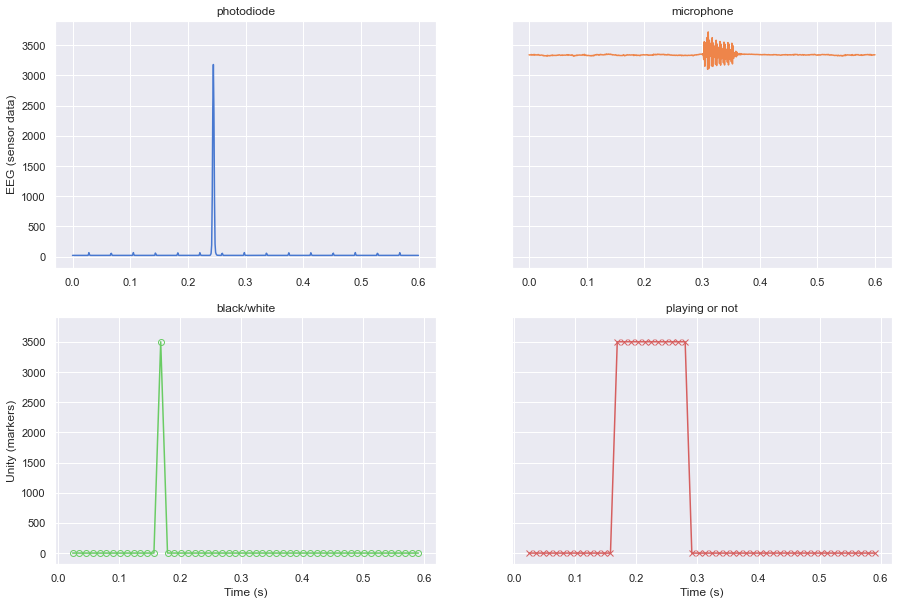

In [80]:
sns.set(rc={"figure.figsize": (14, 5)})  # set figure size
sns.set_style("darkgrid")  # set seaborn plotting style
palette = itertools.cycle(sns.color_palette(palette="muted"))

f_n = -0.1  # starting point (s)
s_n = 0.6  # ending point (s)

start_e = 1024 * f_n  # eeg sampling rate = 1024
start_u = 90 * f_n  # unity sampling rate = 90

e_samples = 1024 * s_n  # N of eeg in 5 s
u_samples = 90 * s_n  # N of unity in 5 s
u_height = 3500  # factor to improve unity (true/1) values visualization

file = recordings[0]["file"].split(".")[0]
e = copy.deepcopy(recordings[0]["eeg"])
u = copy.deepcopy(recordings[0]["unity"])
e_t = e["timestamps"]
u_t = u["timestamps"]
e_a = e["audio"]
e_c = e["color"]
u_c = u["color"]
u_a = u["audio"]

# fix diff array sizes for unity color and audio arrays
u_diff = len(u_c) - len(u_t)
if u_diff > 0:
    # remove the diff from the end of the array
    u_c = u_c[:-u_diff]
elif u_diff < 0:
    # add the diff from the end of the array
    for i in range(abs(u_diff)):
        u_c = np.append(u_c, u_c[-1])

# select range of timestamps, diode and microphone values (eeg)
e_time_selection = e_t[(e_t > f_n) & (e_t < s_n)]
e_color_selection = e_c[(e_t > f_n) & (e_t < s_n)]
e_audio_selection = e_a[(e_t > f_n) & (e_t < s_n)]

# select range of timestamps, color and audio values (unity)
u_time_selection = u_t[(u_t > f_n) & (u_t < s_n)]
u_color_selection = u_c[(u_t > f_n) & (u_t < s_n)]
u_audio_selection = u_a[(u_t > f_n) & (u_t < s_n)]
preview = [
    ["black/white", u_time_selection, u_color_selection * u_height],
    ["playing or not", u_time_selection, u_audio_selection * u_height],
    ["photodiode", e_time_selection, e_color_selection * 0.05],
    ["microphone", e_time_selection, e_audio_selection * 1.5],
]

# plot the selected range to compare eeg vs unity values
nplots = 4  # number of subplots

# define subplots
fig, axes = plt.subplots(nrows=2, ncols=int(nplots / 2), figsize=(15, 10), sharey=True)

axes[0, 0].plot(preview[2][1], preview[2][2], color=next(palette))
axes[0, 0].set_title(preview[2][0])
axes[0, 1].plot(preview[3][1], preview[3][2], color=next(palette))
axes[0, 1].set_title(preview[3][0])
axes[1, 0].plot(
    preview[0][1],
    preview[0][2],
    marker="o",
    color=next(palette),
    markerfacecolor="None",
)
axes[1, 0].set_title(preview[0][0])
axes[1, 1].plot(preview[1][1], preview[1][2], marker="x", color=next(palette))
axes[1, 1].set_title(preview[1][0])

for ax in axes[1, :]:
    ax.set_xlabel("Time (s)")  # set x-axis label
axes[0, 0].set_ylabel("EEG (sensor data)")  # set y-axis label
axes[1, 0].set_ylabel("Unity (markers)")  # set y-axis label
plt.show()

## 5. Recap: How does the data look like?
<img src="img/plot1.png" width="70%">

_What do we look for exactly?_
- __Image latency:__ time between unity color markers and the diode peaks
- __Audio latency:__ time between unity audio playing markers and microphone peaks

## 6. Results
How constant are the framerates?

__Unity (90FPS ~ 11.11ms vs 50FPS ~ 20ms )__

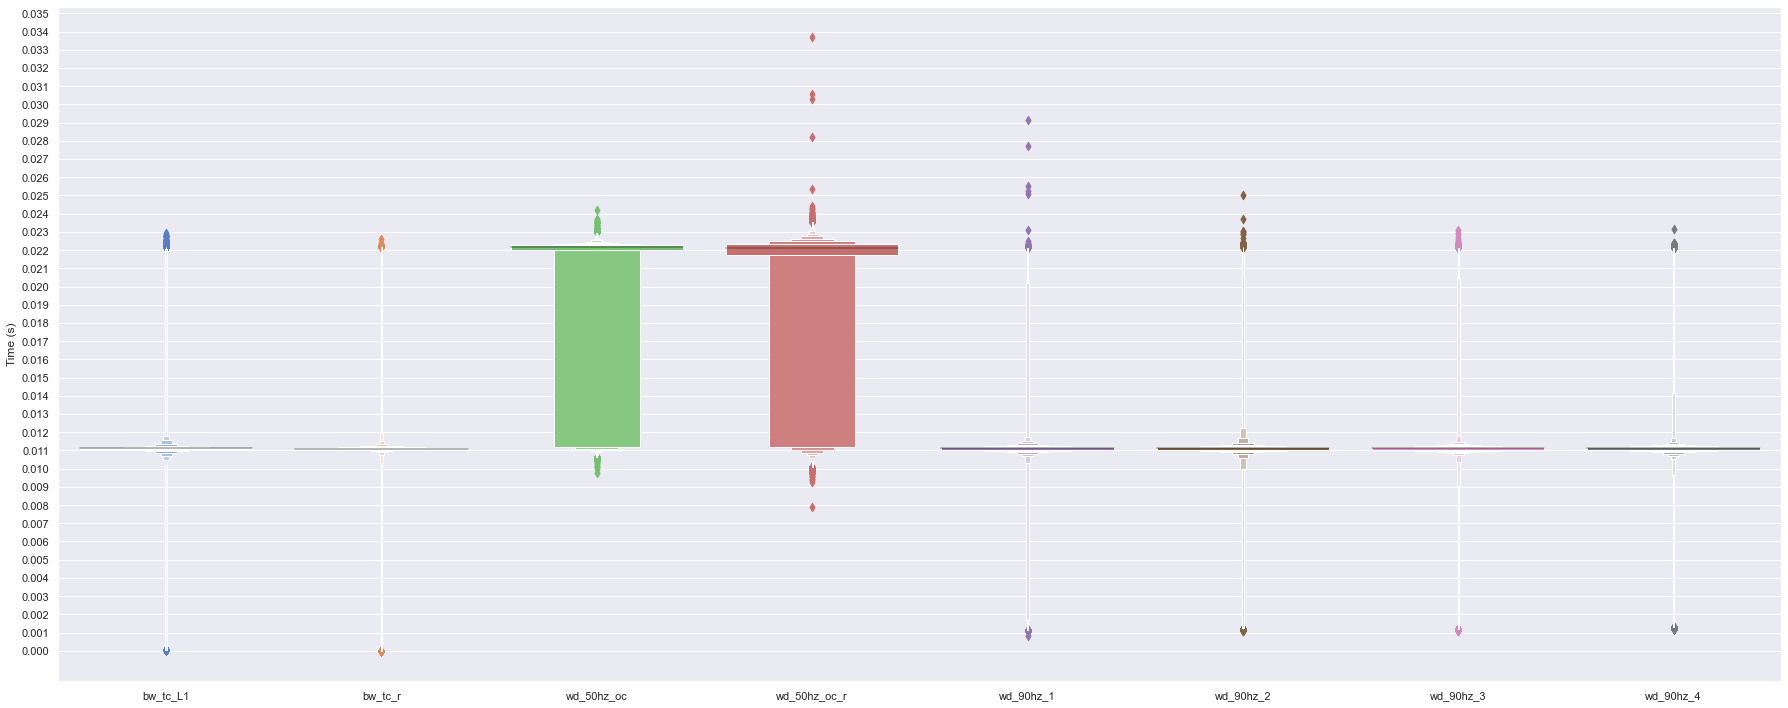

In [16]:
sns.set(rc={"figure.figsize": (25, 10)})  # set figure size
sns.set_style("darkgrid")  # set seaborn plotting style
g = sns.boxenplot(data=u_dist, palette="muted")
g.set_xticklabels(files)
g.set_yticks(np.arange(0, g.get_ylim()[1], 0.001))
plt.ticklabel_format(style="plain", axis="y", useOffset=False)
plt.ylabel("Time (s)")
plt.tight_layout()
plt.show()

## 6. Results
How constant are the framerates?

__Unity (90FPS ~ 11.11ms vs 50FPS ~ 20ms )__

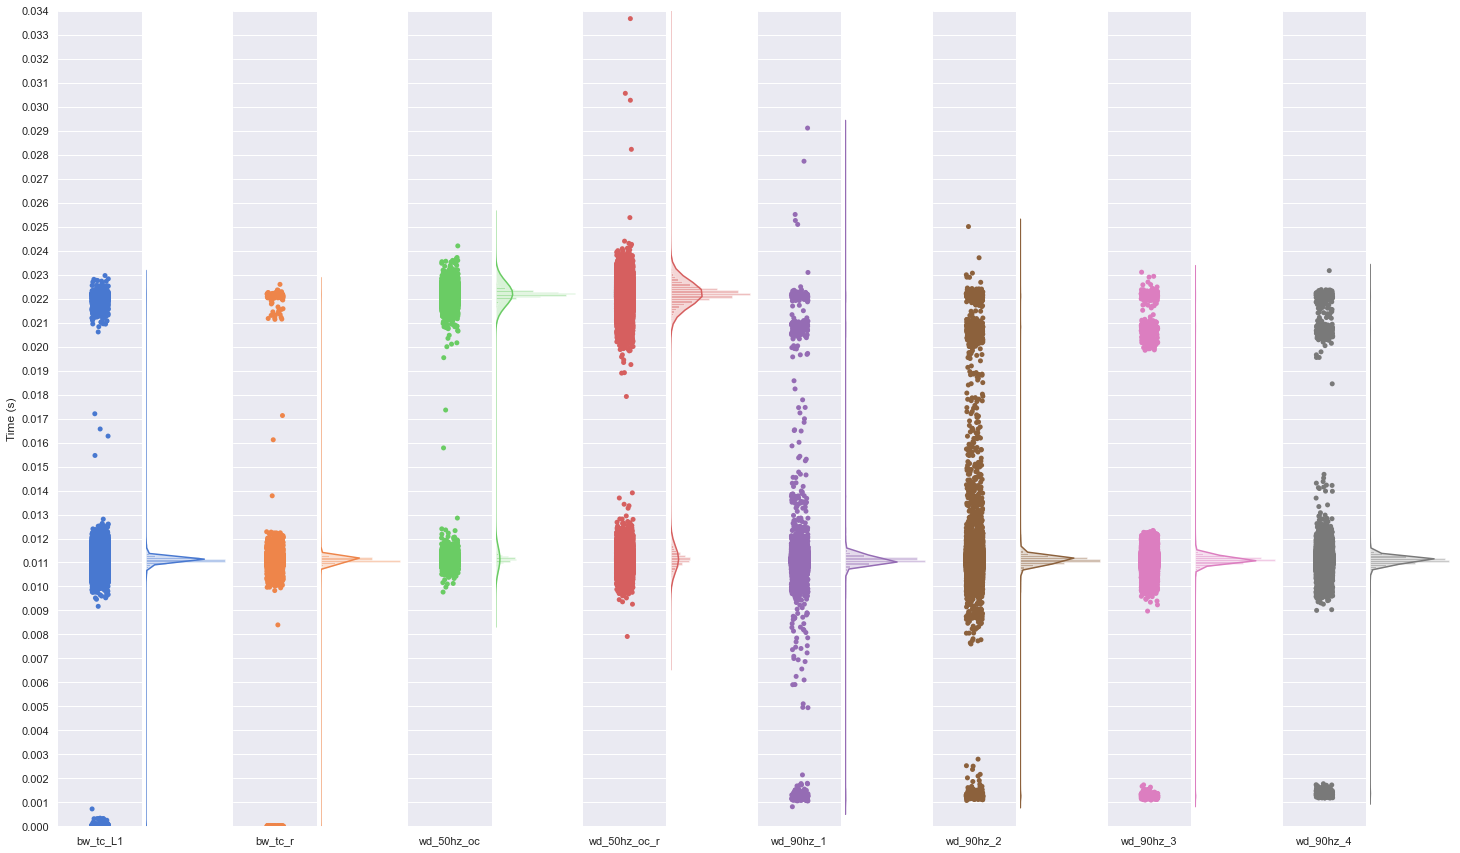

In [17]:
%matplotlib inline
nplots = len(u_dist) * 2  # number of subplots
palette = itertools.cycle(sns.color_palette(palette="muted"))

# define subplots
fig = plt.figure(figsize=(25, 15))
cols = 1
gs = fig.add_gridspec(cols, nplots)

y_max = 0
# since sharey does not work in this context by adding subplots one by one
for dist in u_dist:  # get the maximum y value to set the same scale on subplots
    if max(dist) > y_max:
        y_max = max(dist)

step = 0.001
ticks = np.arange(0, y_max + step, step)
kde = {"shade": True}
j = 0
for i in range(nplots):
    style = "darkgrid" if i % 2 == 0 else "white"
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[i])
        if i % 2 == 0:
            color = next(palette)
            sns.stripplot(x=u_dist[j], ax=ax, orient="v", color=color)
            ax.set_xticklabels([files[j]])  # filename
            ax.set_ylim(0, y_max)
            ax.set_yticks(ticks)
        else:
            sns.distplot(
                u_dist[j],
                ax=ax,
                vertical=True,
                norm_hist=True,
                bins=250,
                kde_kws=kde,
                color=color,
            )
            ax.set_ylim(0, y_max)
            ax.set_yticks(ticks)
            ax.set_xticklabels([])
            sns.despine(left=True, bottom=True)
            j += 1
        if i != 0:
            ax.set_yticklabels([])


plt.subplots_adjust(wspace=0.05)

fig.axes[0].set_ylabel("Time (s)")
plt.show()

## 6. Results
__How to enforce 90FPS instead of 50FPS (default) in Unity?__

<img src="img/unity_time.png" width="50%">

__Important:__ Although this parameter works, it makes Unity more prone to skip frames. Also, on the Unity Editor Player we could not run Westdrive on a `NVIDIA RTX 2080Ti`!
However, it worked on the build :)

## 6. Results
Latencies

__Time distance between unity color markers and the diode peaks__

In [54]:
display(c_stats.style.applymap(color_checks, subset=["AVG"]))

,bw_tc_L1,bw_tc_r,wd_90hz_1,wd_90hz_2,wd_90hz_3,wd_90hz_4,AVG
count,7706.000000,856.000000,1218.000000,2407.000000,2385.000000,2414.000000,2831.000000
mean,0.075361,0.085203,0.083596,0.083538,0.083470,0.083755,0.082487
std,0.000301,0.000601,0.000715,0.000785,0.000491,0.000703,0.000599
min,0.074084,0.084378,0.081619,0.078895,0.081069,0.080676,0.080120
25%,0.075118,0.084939,0.083269,0.083209,0.083205,0.083406,0.082191
50%,0.075364,0.085185,0.083534,0.083479,0.083460,0.083697,0.082453
75%,0.075610,0.085423,0.083796,0.083741,0.083716,0.083968,0.082709
max,0.075989,0.096419,0.093438,0.094801,0.094282,0.095103,0.091672


## 6. Results
Latencies

__Time distance between unity color markers and the diode peaks__

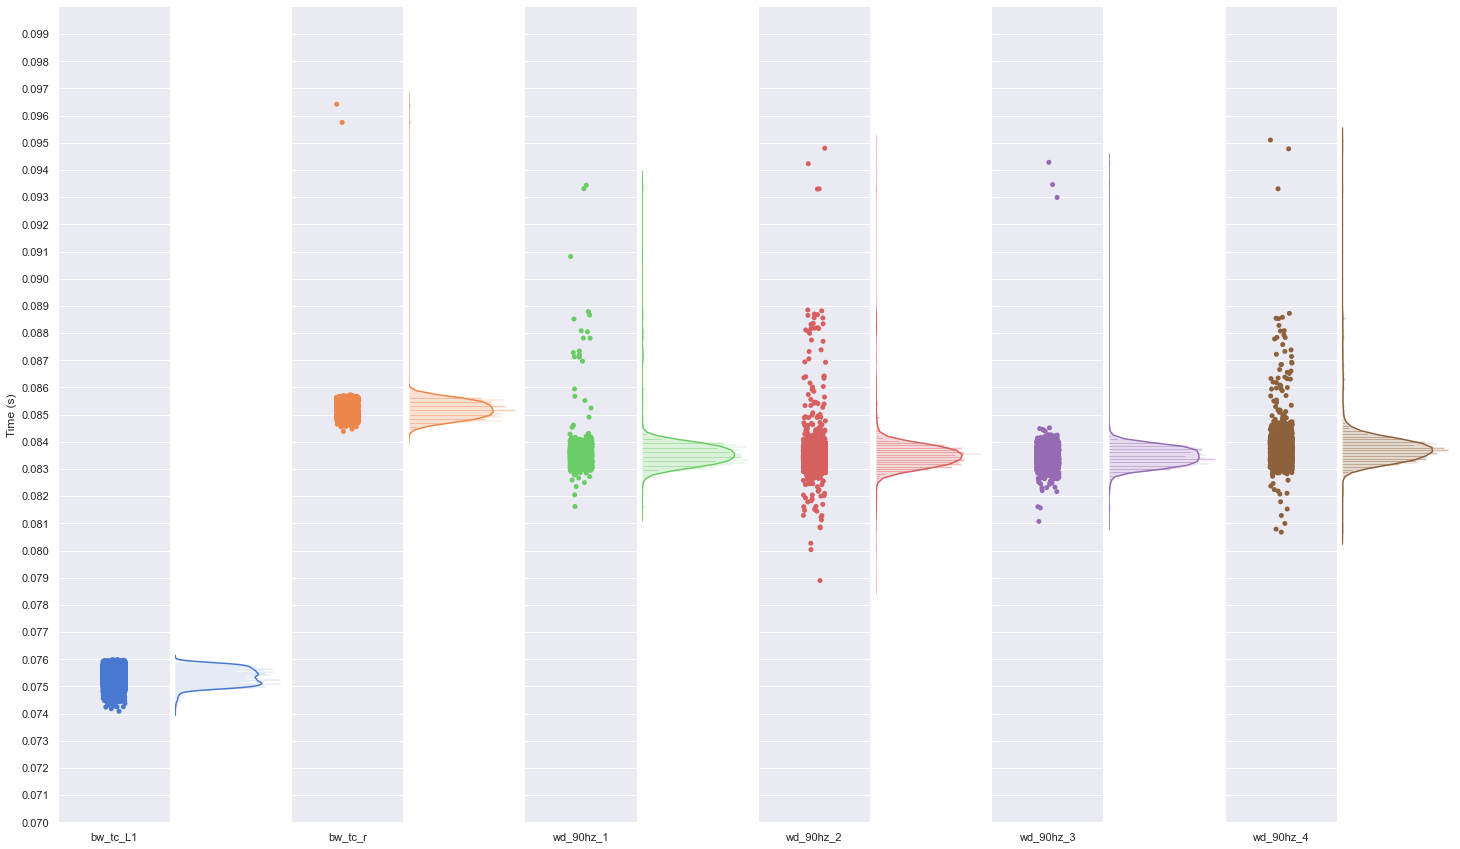

In [55]:
%matplotlib inline
nplots = len(c_diff_all) * 2  # number of subplots
palette = itertools.cycle(sns.color_palette(palette="muted"))

# define subplots
fig = plt.figure(figsize=(25, 15))
cols = 1
gs = fig.add_gridspec(cols, nplots)

y_min = 0.07
y_max = 0.1
# since sharey does not work in this context by adding subplots one by one
# for dist in c_diff_all:  # get the maximum y value to set the same scale on subplots
#     if max(dist) > y_max:
#         y_max = max(dist)
#     if min(dist) < y_min:
#         y_min = min(dist)

step = 0.001
ticks = np.arange(y_min, y_max, step)

kde = {"shade": True}
j = 0
for i in range(nplots):
    style = "darkgrid" if i % 2 == 0 else "white"
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[i])
        if i % 2 == 0:
            color = next(palette)
            sns.stripplot(x=c_diff_all[j], ax=ax, orient="v", color=color)
            ax.set_xticklabels([files[j]])  # filename
            ax.set_ylim(y_min, y_max)
            ax.set_yticks(ticks)
            ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
        else:
            sns.distplot(
                c_diff_all[j],
                ax=ax,
                vertical=True,
                norm_hist=True,
                bins=250,
                kde_kws=kde,
                color=color,
            )
            ax.set_ylim(y_min, y_max)
            ax.set_yticks(ticks)
            ax.set_xticklabels([])
            sns.despine(left=True, bottom=True)
            j += 1
        if i != 0:
            ax.set_yticklabels([])


plt.subplots_adjust(wspace=0.05)

fig.axes[0].set_ylabel("Time (s)")
plt.show()

## 6. Results
Latencies

__Time distance between unity audio playing markers and microphone peaks__

In [71]:
display(a_stats.style.applymap(color_checks, subset=["AVG"]))

,bw_tc_L1,bw_tc_r,wd_90hz_1,wd_90hz_2,wd_90hz_3,wd_90hz_4,AVG
count,7744.000000,860.000000,1185.000000,2416.000000,2395.000000,2423.000000,2837.166667
mean,0.141957,0.151279,0.188110,0.134765,0.135461,0.135430,0.147833
std,0.005408,0.003756,0.006367,0.003473,0.005617,0.003710,0.004722
min,0.125079,0.140721,0.174040,0.106402,0.112354,0.101700,0.126716
25%,0.138423,0.148477,0.183037,0.132218,0.131132,0.132934,0.144370
50%,0.141960,0.151101,0.188238,0.134754,0.134877,0.135556,0.147748
75%,0.145502,0.153893,0.193318,0.137348,0.139080,0.138031,0.151196
max,0.197155,0.162342,0.199990,0.143965,0.162306,0.144170,0.168321


## 6. Results
Latencies

__Time distance between unity audio playing markers and microphone peaks__

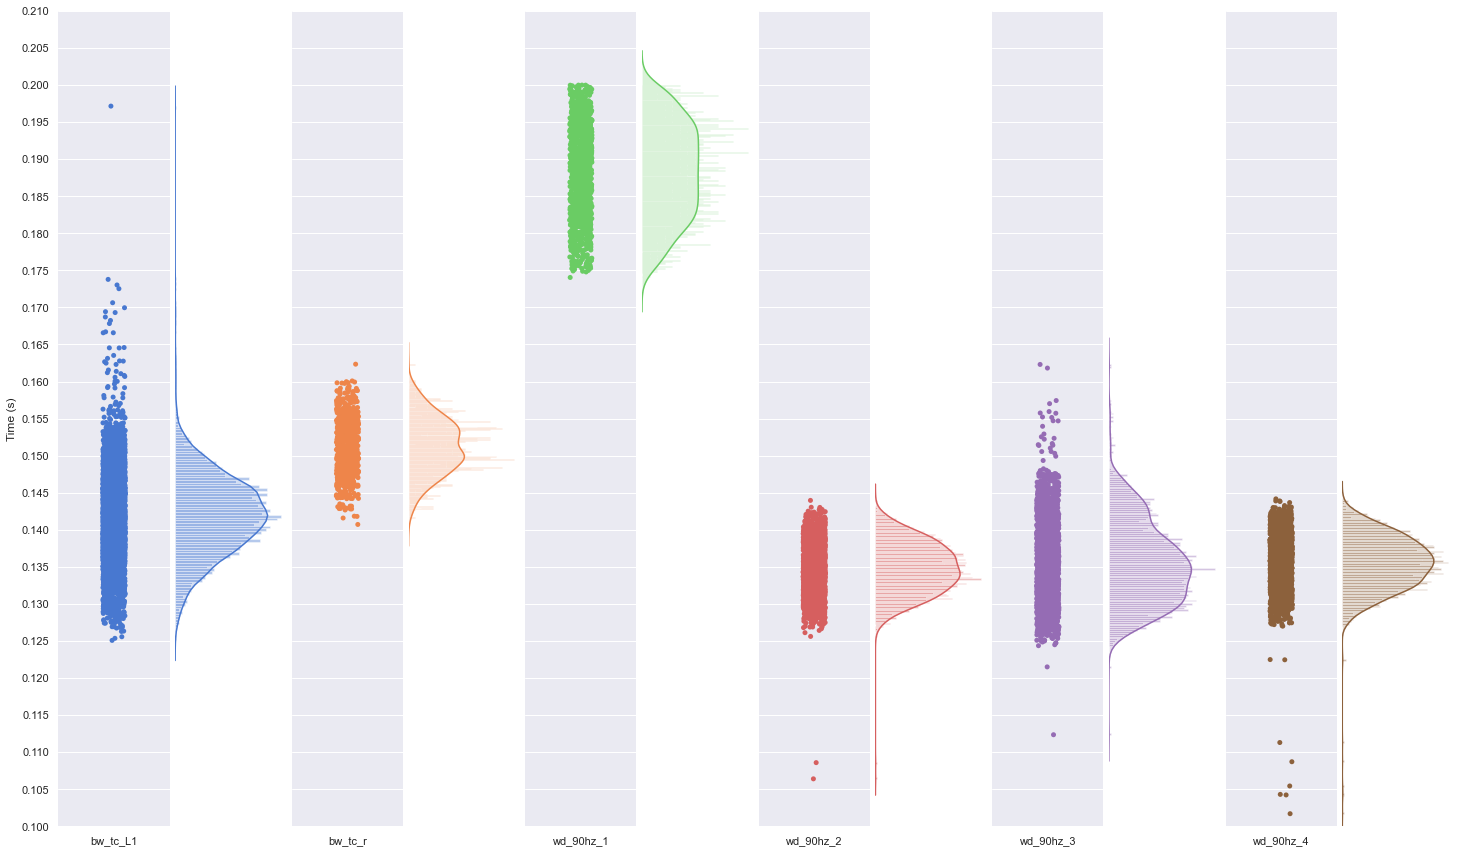

In [74]:
%matplotlib inline
nplots = len(a_diff_all) * 2  # number of subplots
palette = itertools.cycle(sns.color_palette(palette="muted"))

# define subplots
fig = plt.figure(figsize=(25, 15))
cols = 1
gs = fig.add_gridspec(cols, nplots)

columns = list(a_stats.columns)
del columns[-1]

y_max = 0.21
y_min = 0.1
# since sharey does not work in this context by adding subplots one by one
# for dist in a_diff_all:  # get the maximum y value to set the same scale on subplots
#     if max(dist) > y_max:
#         y_max = max(dist)
#     if min(dist) < y_min:
#         y_min = min(dist)
step = 0.005
ticks = np.arange(y_min, y_max + step, step)
kde = {"shade": True}
j = 0
for i in range(nplots):
    style = "darkgrid" if i % 2 == 0 else "white"
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[i])
        if i % 2 == 0:
            color = next(palette)
            sns.stripplot(x=a_diff_all[j], ax=ax, orient="v", color=color)
            ax.set_xticklabels([columns[j]])  # filename
            ax.set_ylim(y_min, y_max)
            ax.set_yticks(ticks)
            ax.yaxis.set_major_formatter(FormatStrFormatter("%.3f"))
        else:
            sns.distplot(
                a_diff_all[j],
                ax=ax,
                vertical=True,
                norm_hist=True,
                bins=200,
                kde_kws=kde,
                color=color,
            )
            ax.set_ylim(y_min, y_max)
            ax.set_yticks(ticks)
            ax.set_xticklabels([])
            sns.despine(left=True, bottom=True)
            j += 1
        if i != 0:
            ax.set_yticklabels([])

plt.subplots_adjust(wspace=0.05)
fig.axes[0].set_ylabel("Time (s)")
plt.show()

## 7. Conclusions and remarks
- Unity skips 1-2% of the triggers (frames) when enforcing it to 90FPS instead of the 50FPS (default)
- A better CPU on the recorder computer seems to contribute on a more precise aligning of streams
- Same goes for a better GPU to keep the framerate as constant as possible
- Latency for video looks pretty constant ~75ms and std of 0.4ms (2D old recordings), ~83ms and std of 0.4-0.7ms (2D and 3D new recordings)
- We assume this latency is project and device dependant. So, test your project to compute your latency!
- Latency for audio ~135ms or higher (std of 3ms-6ms), also project dependant
- Best latency for audio parameter seems to reduce it and also to reduce variance, but still far from usable for EEG (min-max diff > 10ms)
- __Using LSL for recording Unity and EEG data looks reliable for image stimuli__

## 8. Future outlook

- New recordings and data analysis using a our Westdrive scenes with the moving camera
- Redo the recordings in a sound isolated room to see if the audio latency detection improves
- Try a new audio engine if there is any that could help getting better results

## Resources

- [Liblsl](https://github.com/sccn/liblsl/releases/latest)
- [LabRecorder](https://github.com/labstreaminglayer/App-LabRecorder/releases)
- [LSL4Unity](https://github.com/labstreaminglayer/LSL4Unity)
- [liblsl-Csharp](https://github.com/labstreaminglayer/liblsl-Csharp)
- [LSL Apps](https://github.com/sccn/labstreaminglayer/tree/master/Apps)
- [LSL documentation reference](https://labstreaminglayer.readthedocs.io/)
- [LSL latency analysis](https://github.com/mvidaldp/lsl_latency_analysis)
- [LSL in Unity](https://github.com/mvidaldp/lsl_in_unity)
- [How to install and use LSL tutorial](https://docs.google.com/document/d/1NCLiLwMQpt9QKIw7sOM4N62vdDu3Nyw78928Jpz5VIU/edit?usp=sharing)
- [OpenVibe](http://openvibe.inria.fr/downloads/)
- [Audio tones generator](https://github.com/mvidaldp/pytonegen)
